**Introduction**  
The goal of the exercise is to determine which features are relevant in predicting whether a user will adopt the product. Adoption is defined as a user having used the product 3 times of more during a rolling 7 day period.

A dataset of user attributes and a dataset of user engament are provided. From the user engagement dataset we can derive which users meet the criterion to be considered "adopted users".  
The data with user attributes can be use to build the predictive model and investigate the predictive power of the features. Some of the features in the user attributes dataset are transformed while others are dropped (like name, email address). 
The categorical feature "creation_source" is split up into its components ("dummy variables"), giving us 5 extra feature columns. 

Some extra work can be done on feature engineering and finding additional source of data (see conclusion).

** Getting and preprocessing the data**  
Fortunately the data fits in memory, so we can just load it into python and analyse it. There is the option of downloading csv files or using a MySQL data base. I chose to use the *sqlalchemy* python package to load the data from the MySQL data base. And do subsequent analysis in python.  

What follows is the result of the built model. See the comments in the code for a further technical explanation.


In [15]:
from feature_analysis import FeatureAnalysis
%matplotlib inline
fa=FeatureAnalysis()
fa.preprocess_features()

Reading data from MySQL into data frames...
Determining adopted users...
Done reading in data.
Preprocessing features...
Done preprocessing.



**Exploratory work**  
First of all, after getting and preprocessing the data, let's take a look at how the various features are distributed between adopted and not adopted users. To do this, we caluculate the proportion for each feature with respect to an adopted or a non-adopted user. These values can be plotted in a histogram to quickly inspect visually if there are any large discrepancies in relative occurence of the features between classes. On the x-axis are the features, on the y-axis the occurence percentages.  
*It is clear from the figure above that the features are pretty evenly distributed among the classes.*

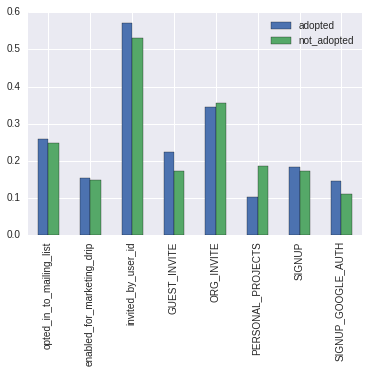

In [16]:
fa.plot_histogram()

**Finding the import features**  
A random forest classifier model is a good choice to assess this data set and investigate the predictive power of the (mostly binary) features. Using a random forest, one can omit cross validation and it will work reasonably well with its default parameters. However some parameters ARE tweaked for increasing model performance (see code). 
Besides, during fitting of the classifier the *out of bag* error is estimated, an indication of the model performance. Afer fitting the model, you can find out which features have the most predicitve power. 

A problem in this case is that the classes are quite unbalanced (12000 total users, ~1600 adopted ones). Random forests can struggle in these scenarios, fortunately we can account for this when initializing the model using the "class_weight" parameter.  

After fitting the model, the output is as follows:

In [17]:
fa.do_random_forest()

Model Out Of Bag Error: 0.553541666667

Precision: 0.147317073171
Recall: 0.471875
F1_score: 0.224535315985

Feature Importances:
PERSONAL_PROJECTS; 0.452171251491
SIGNUP_GOOGLE_AUTH; 0.152725680309
GUEST_INVITE; 0.107655805652
enabled_for_marketing_drip; 0.0775793321977
opted_in_to_mailing_list; 0.0670174704876
invited_by_user_id; 0.058277671353
ORG_INVITE; 0.0440204690996
SIGNUP; 0.0405523194105


First off, we can see that the OOB error is high, the other performance metrics precision, recall (and the f1 score) are pretty horrible as well. The recall is the "best", meaning that the model is doing a better job at avoiding false negatives than avoiding false positives. But overall this is poor performance.

It is clear that the model perform poorly, see the conclusion and recommendations sections for suggestions on how to improve the quality of the model.

Three of the features seem to be giving some signal. The top one is the PERSONAL_PROJECTS feature which indicates that the user was invited to somebody's private workspace. It makes sense that this could be an indicator for adoption.  
Users who sign up using their google account may already have an intention to integrate the product into their day-to-day workflow.

**Conclusions and recommendations**  
The analysis above concludes that there are a couple of features that seem to be the most powerful for predicting whether or not a user will be an adopter. However, overall model performance is poor and therfore I would not put too much faith in the predictive power of those features.

Given more time and if I were to build out this model to be useful in a production environment, I would do a couple of things:

First of all, I would implement proper error handling and testing. Currently there is no error handling whatsoever, nor any regression tests implemented.  

Secondly, I would create extra features through feature engineering. I've got a sense that there may be signal in a couple of things:  
* If an adopted user (one with many and recent product engagements) invites a new user, is this new user more likely to become adopted as well?  
* There could also be signal in which organisation (or group of users) is inviting the user (the org_id column). Perhaps the activity of the inviting group of users has got a positive effect on the activity of the invited user.  

In conclusion, this could prove to be a pretty tough model to build just based on this data. I would look to see if I can find other (user engagement, product usage statistics) data to supplement.